<a href="https://colab.research.google.com/github/rondonit/data-science-course-ufsm/blob/main/trabalho_01_veiculos_eletricos_gabriel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1

## Grupo

- GABRIEL PIRES DA CRUZ
- ISABELA ACOSTA RODRIGUES
- TAIANA FALEIRO DOS SANTOS
- WAGNER SPINATO CHITTO

# Modelos Escolhidos:

1. XGBoost: Boa capacidade para lidar com relações não lineares complexas, o que é importante para o problema escolhido, já que o número de veículos elétricos depende de relaçòes socioeconômicas complexas. Além disso, o XGBost não é tão sensível a outliers e possui mecanismos para evitar overfitting.


# Etapa 1: Imersão nos dados

Nessa etapa, faremos primeiramente o carregamento de dados para um DataFrame do Pandas, faremos uma análise sobre a estrutura do DataFrame bruto (tipo de dados e dimensões).

Seguiremos com uma análise exploratórias dos dados (AED) para adquirirmos uma compreensão inicial sobre os dados e o que eles representam.

Posteriormente, será necessário fazer um tratamento nos dados, que inclui a remoção de duplicatas, remoção de valores inválidos ou nulos.

## 1.1 Carregamento dos dados e exploração inicial

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados do CSV "dados_treino_alunos.csv"
df_dados = pd.read_csv("dados_treino_alunos.csv")

# Verificar tipos de dados e dimensões
print("-----\nSaída de df_dados.info():\n")
print(df_dados.info())
print("-----\nSaída de df_dados.head():\n")
print(df_dados.head())

-----
Saída de df_dados.info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12006 entries, 0 to 12005
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Nome_UF                          12006 non-null  object 
 1   Nome_Município                   12006 non-null  object 
 2   Tipo_de_VE                       12006 non-null  object 
 3   Qtd. Veículos                    12006 non-null  int64  
 4   Cod_municipio                    12006 non-null  int64  
 5   Ano                              12006 non-null  int64  
 6   Potencia_instalada_fotovoltaica  12006 non-null  float64
 7   Tarifa_eletrica                  12006 non-null  float64
 8   Densidade_demo                   12006 non-null  float64
 9   Frota                            12006 non-null  float64
 10  Num_medio_salariosMin            12006 non-null  float64
 11  Num_empregados                   12006 non-null

In [ ]:
# Verificar duplicatas
df_dados.duplicated().sum()

np.int64(0)

## 1.2 Preparação dos dados

Nessa etapa faremos o tratamento e preparação dos dados.
Vamos agrupar os diversos tipos de carros elétricos em uma categoria única e remover as colunas do DataFrame que não serão mais necessárias.
Vamos tratar os dados numéricos para evitar valores inválidos.
Preencheremos os valores inexistentes e inválidos com a mediana daquela coluna.

In [ ]:
# Somar veículos elétricos de cada município pelo código em uma nova coluna
df_dados['total_veiculos_eletricos'] = df_dados.groupby('Cod_municipio')['Qtd. Veículos'].transform('sum')
# Dropar linhas com o código do município igual
df_dados = df_dados.drop_duplicates(subset=['Cod_municipio'])
# Dropar coluna Tipo_de_VE (pois vamos considerar todos como uma única categoria)
df_dados = df_dados.drop(columns=['Tipo_de_VE'])
# Dropar coluna ano (pois é igual em todo o conjunto de dados)
df_dados = df_dados.drop(columns=['Ano'])
# Dropar coluna Qtd. Veículos
df_dados = df_dados.drop(columns=['Qtd. Veículos'])
# Dropar colunas identificadoras e UF
df_dados = df_dados.drop(columns=['Cod_municipio', 'Nome_Município', 'Cod_municipio', 'Nome_UF'])


for col in df_dados.columns:
    df_dados[col] = pd.to_numeric(df_dados[col], errors='coerce')

# preencher dados inválidos com a mediana do valor daquela coluna
df_dados = df_dados.fillna(df_dados.median())

# remover linhas com dados inválidos
df_dados = df_dados.dropna()

print(df_dados.head(10))
print(df_dados.info())

    Potencia_instalada_fotovoltaica  Tarifa_eletrica  Densidade_demo    Frota  \
0                           3467.06       686.555813            3.04  16100.0   
3                           1281.94       686.555813            2.90   5868.0   
4                           3030.30       686.555813            6.15   9212.0   
6                           3024.26       686.555813            4.33   9131.0   
8                          28751.08       686.555813           21.88  82721.0   
15                          8310.64       686.555813            8.57  24877.0   
17                          1322.32       686.555813            4.07   4039.0   
19                          1077.34       686.555813            2.12   2330.0   
20                         25024.72       686.555813           22.91  75559.0   
26                          1558.20       686.555813            3.26   7810.0   

    Num_medio_salariosMin  Num_empregados  Num_empresas       PIB  Populacao  \
0                     2.1   

/tmp/ipython-input-4-881217496.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  veiculos_por_intervalo = df_dados.groupby('populacao_intervalo')['total_veiculos_eletricos'].mean().reset_index()
/tmp/ipython-input-4-881217496.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


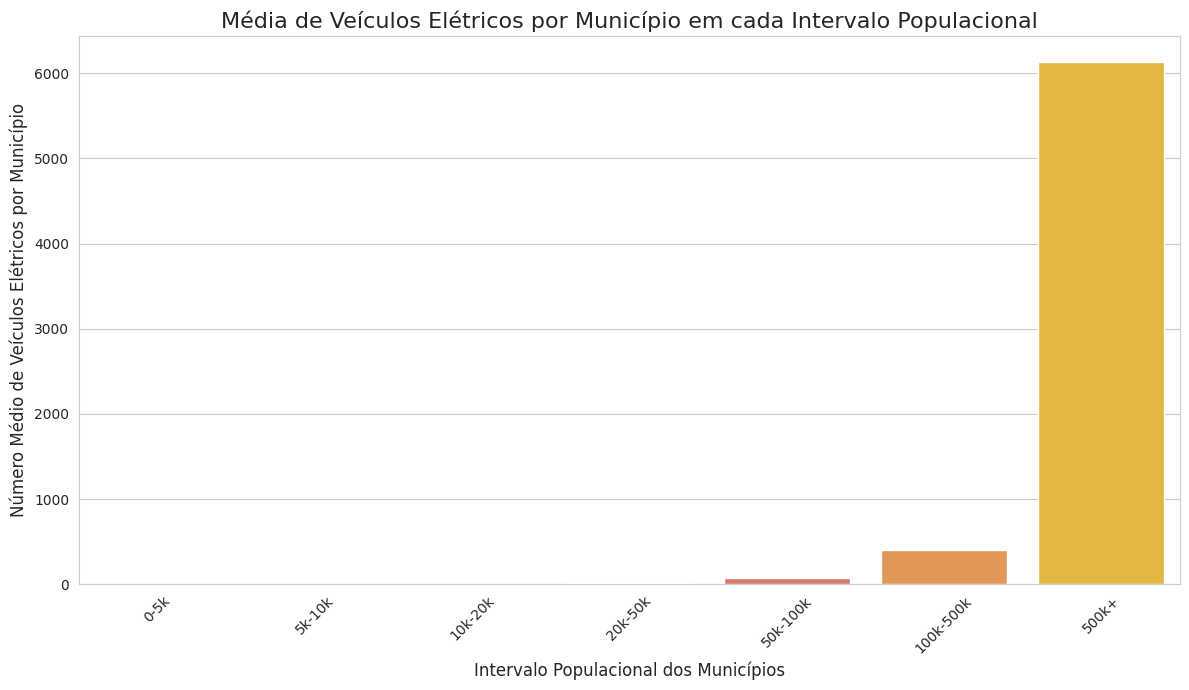

In [ ]:
# Plotar gráfico de histograma para analisarmos a distribuição de veículos elétricos pela população do município

bins = [0, 5000, 10000, 20000, 50000, 100000, 500000, float('inf')]
labels = ['0-5k', '5k-10k', '10k-20k', '20k-50k', '50k-100k', '100k-500k', '500k+']
df_dados['populacao_intervalo'] = pd.cut(df_dados['Populacao'], bins=bins, labels=labels)

veiculos_por_intervalo = df_dados.groupby('populacao_intervalo')['total_veiculos_eletricos'].mean().reset_index()

# estilo
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Criamos o gráfico de barras
barplot = sns.barplot(
    data=veiculos_por_intervalo,
    x='populacao_intervalo',
    y='total_veiculos_eletricos',
    palette='plasma', # Mudei a paleta de cores para diferenciar do gráfico anterior
    order=labels # Garante a ordem correta das barras
)

# Adicionamos títulos e rótulos para maior clareza
plt.title('Média de Veículos Elétricos por Município em cada Intervalo Populacional', fontsize=16)
plt.xlabel('Intervalo Populacional dos Municípios', fontsize=12)
plt.ylabel('Número Médio de Veículos Elétricos por Município', fontsize=12)
plt.xticks(rotation=45) # Rotaciona os rótulos do eixo x para melhor leitura

# Ajusta o layout para evitar que os elementos se sobreponham
plt.tight_layout()

# Exibe o gráfico
plt.show()

# Posso descartar essa coluna de intervalo populacional
df_dados = df_dados.drop(columns=['populacao_intervalo'])

## 1.2 Regressão Linear para obter matriz de correlação

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Separar dados para treino e teste usando traintestsplit
df_treino, df_teste = train_test_split(df_dados, test_size=0.2, random_state=42)

x_train = df_treino.drop(columns=['total_veiculos_eletricos'])
y_train = df_treino['total_veiculos_eletricos']

x_test = df_teste.drop(columns=['total_veiculos_eletricos'])
y_test = df_teste['total_veiculos_eletricos']

# regressao linear
modelo_regressao_linear = LinearRegression().fit(x_train, y_train)

y_pred = modelo_regressao_linear.predict(x_test)

# obter métricas e coeficientes
mse = mean_squared_error(y_test, y_pred)
r_quadrado = modelo_regressao_linear.score(x_test, y_test)
coeficientes = modelo_regressao_linear.coef_
intercepto = modelo_regressao_linear.intercept_

print(f"Erro Quadrático Médio (MSE): {mse}")

# imprimir resultados
print("R²:", r_quadrado)
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)


Erro Quadrático Médio (MSE): 496416.7548444123
R²: 0.9331935639228968
Coeficientes: [ 6.48485843e-04  4.41603823e-03  1.58276537e-02  1.09720871e-05
  6.60896896e-01  6.31255241e-03  4.08914711e-02 -3.92999907e-04
  3.09182165e-04 -4.34991762e-04  3.83048912e+01  2.92937976e+01
 -1.99762273e+02 -7.92905882e+02  1.25224285e-02 -5.86036346e-03
  1.19843385e+02  1.09952567e+00 -1.71198905e+01 -3.71882197e+02
 -2.32166866e+01  8.99199794e+02]
Intercepto: 119.22740740565216


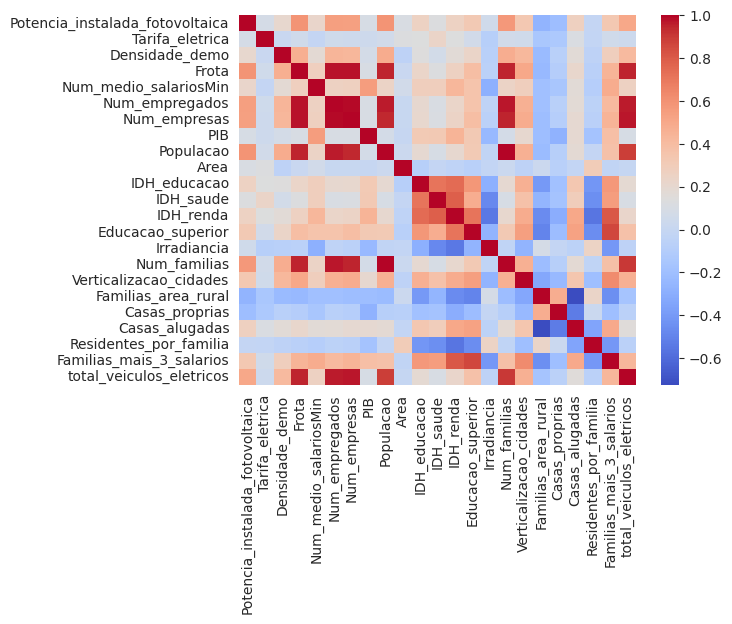

In [ ]:
# Matriz de correlação com heatmap
corr_matrix = df_treino.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

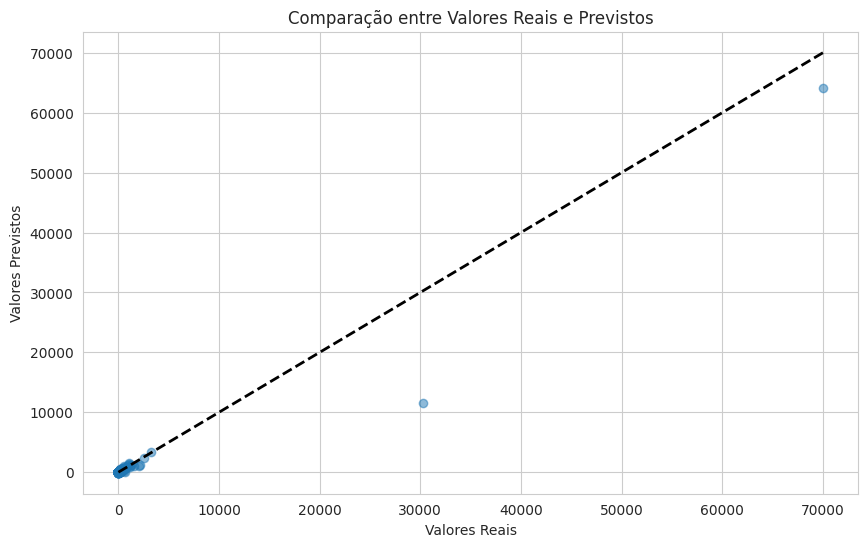

In [ ]:
# scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(10,6))
# Change y to y_test to compare true values of the test set with predictions
plt.scatter(y_test, y_pred, alpha=0.5)
# Change y.min() and y.max() to y_test.min() and y_test.max() for correct range
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos')
plt.show()

# 1.3 Engenharia de Features

Criação de novas features a partir das existentes que possam ter valor preditivo para o target **total_veiculos_eletricos**.

## Features novas escolhidas
- PIB per capita **(PIB / populacao)**
- Proporção de Famílias de Renda Alta **(Familias_mais_3_salarios / Num_familias)**
- Densidade Econômica **(PIB/Área - Indicando lugares com alta concentração de infraestrutura)**

In [ ]:
# Novas features:
# - PIB pe Capita
# - Percentual de motorização
# - Proporção de famílias de alta renda
# - Proporção de eletrificação da frota

df_dados['pib_per_capita'] = df_dados['PIB'] / df_dados['Populacao']
df_dados['taxa_motorizacao'] = df_dados['Frota'] / df_dados['Populacao']
df_dados['prop_alta_renda'] = df_dados['Familias_mais_3_salarios'] / df_dados['Num_familias']
df_dados['prop_veiculos_eletricos'] = df_dados['total_veiculos_eletricos'] / df_dados['Frota']

## 1.4 Avaliação das Novas Features
Nessa etapa faremos uma nova metriz de correlação para determinarmos a relevância dessas novas features.

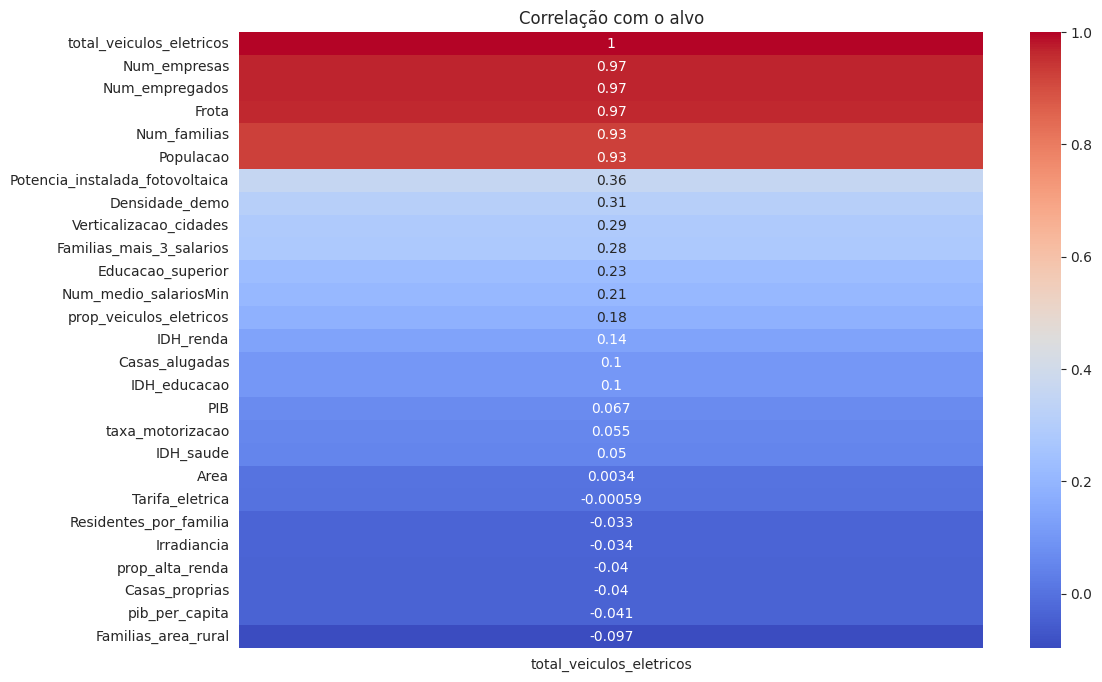

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_dados.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr[['total_veiculos_eletricos']].sort_values(by='total_veiculos_eletricos', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Correlação com o alvo')
plt.show()


# 2 - Preparação para XGBoost

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import xgboost as xgb

# Separar features e target
X = df_dados.drop(columns=['total_veiculos_eletricos'])
y = df_dados['total_veiculos_eletricos']

# Escalonamento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir dados de treino e valuidação
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# XGBoost
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE Inicial: {rmse}')

RMSE Inicial: 2519.4240413237308


# 2.1 - Otimização com Hiperparâmetros

In [ ]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_scaled, y)

print(f'Melhores parâmetros: {grid.best_params_}')
print(f'RMSE na validação cruzada: {-grid.best_score_}')


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Melhores parâmetros: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
RMSE na validação cruzada: 691.9071502685547


# Modelo Final:

In [ ]:
# Instanciar o modelo final com os melhores hiperparâmetros
modelo_final = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=1.0,
    learning_rate=0.01,
    max_depth=5,
    n_estimators=100,
    subsample=0.8,
    random_state=42
)

# Treinar no dataset completo
modelo_final.fit(X_scaled, y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Após ter treinado o modelo e feito previsões:
y_pred = modelo_final.predict(X_val)

# Calcular métricas
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Imprimir
print('===== Métricas de Desempenho =====')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.4f}')


===== Métricas de Desempenho =====
RMSE: 1733.61
MAE: 120.94
R²: 0.5955


# NAO ESQUECER
validacao cruzada e otimizacao de hiperparametros
best estimator